In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Load the dataset
def load_dataset():
    train_dataset = h5py.File("train_catvnoncat.h5", "r")
    test_dataset = h5py.File("test_catvnoncat.h5", "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Training images
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Training labels
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])    # Test images
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])    # Test labels
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

# Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
def initialize_parameters(dim):
    w = np.zeros((dim, 1))  
    b = 0.0     
    
    return w, b

# Forward and backward propagation
def propagate(w, b, X, Y):
    # Number of examples
    m = X.shape[1] 
    
    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)  
    
    # Cost function
    cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  
    
    # Gradient for weights
    dw = (1 / m) * np.dot(X, (A - Y).T)  
    
    # Gradient for bias
    db = (1 / m) * np.sum(A - Y)         
    
    return dw, db, cost

# Optimization using gradient descent
def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        dw, db, cost = propagate(w, b, X, Y)
        w -= learning_rate * dw
        b -= learning_rate * db
        costs.append(cost)
        
    return w, b, costs

# Make predictions
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    return (A > 0.5).astype(int)


In [2]:
# Load and preprocess data
train_x_orig, train_y_orig, test_x_orig, test_y_orig = load_dataset()

# Modify training and test sets
last_digit = 1  

# New training set
new_train_x_orig = train_x_orig[:160 + last_digit]  
new_train_y_orig = train_y_orig[:160 + last_digit]

# New test set
new_test_x_orig = train_x_orig[160 + last_digit:]  
new_test_y_orig = train_y_orig[160 + last_digit:]

# Preprocess new datasets
new_train_x = new_train_x_orig.reshape(new_train_x_orig.shape[0], -1).T / 255.
new_train_y = new_train_y_orig.reshape(1, -1)

new_test_x = new_test_x_orig.reshape(new_test_x_orig.shape[0], -1).T / 255.
new_test_y = new_test_y_orig.reshape(1, -1)

# Train logistic regression model on new data
dim = new_train_x.shape[0]
w, b = initialize_parameters(dim)
num_iterations = 2000
learning_rate = 0.005
w, b, costs = optimize(w, b, new_train_x, new_train_y, num_iterations, learning_rate)

# Evaluate model
new_train_predictions = predict(w, b, new_train_x)
new_test_predictions = predict(w, b, new_test_x)

new_train_accuracy = np.mean(new_train_predictions == new_train_y) * 100
new_test_accuracy = np.mean(new_test_predictions == new_test_y) * 100

# Identify misclassified indices in the new test set
new_misclassified_indices = np.where(new_test_predictions != new_test_y)[1]

# Display results
print(f"New Training Accuracy: {new_train_accuracy:.2f}%")
print(f"New Test Accuracy: {new_test_accuracy:.2f}%")
print(f"New Misclassified Indices: {new_misclassified_indices}")


New Training Accuracy: 100.00%
New Test Accuracy: 56.25%
New Misclassified Indices: [ 1  2  3  6  8  9 10 12 14 16 18 22 24 27 31 34 35 36 37 39 43]


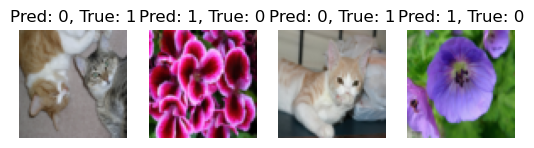

In [3]:
# Display 4 misclassified images
for i, idx in enumerate(new_misclassified_indices[:4]):
    plt.subplot(1, 4, i + 1)
    plt.imshow(new_test_x_orig[idx])
    plt.title(f"Pred: {new_test_predictions[0, idx]}, True: {new_test_y[0, idx]}")
    plt.axis('off')
plt.show()